In [12]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [7]:
# Configurar estilo de gráficos
sns.set_theme(style="whitegrid")

# Importar librerías y cargar datos

In [ ]:
# Cargar el dataset
file_path = '../data/raw/creditcard.csv'  
data = pd.read_csv(file_path)

In [9]:
# Inspección inicial
print("Dimensiones del dataset:", data.shape)
print("Primeras filas del dataset:")
display(data.head())

Dimensiones del dataset: (284807, 31)
Primeras filas del dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Resumen estadístico y visualización de distribuciones

In [10]:
# Resumen estadístico
print("Estadísticas descriptivas:")
display(data.describe())

Estadísticas descriptivas:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Visualización de distribuciones:


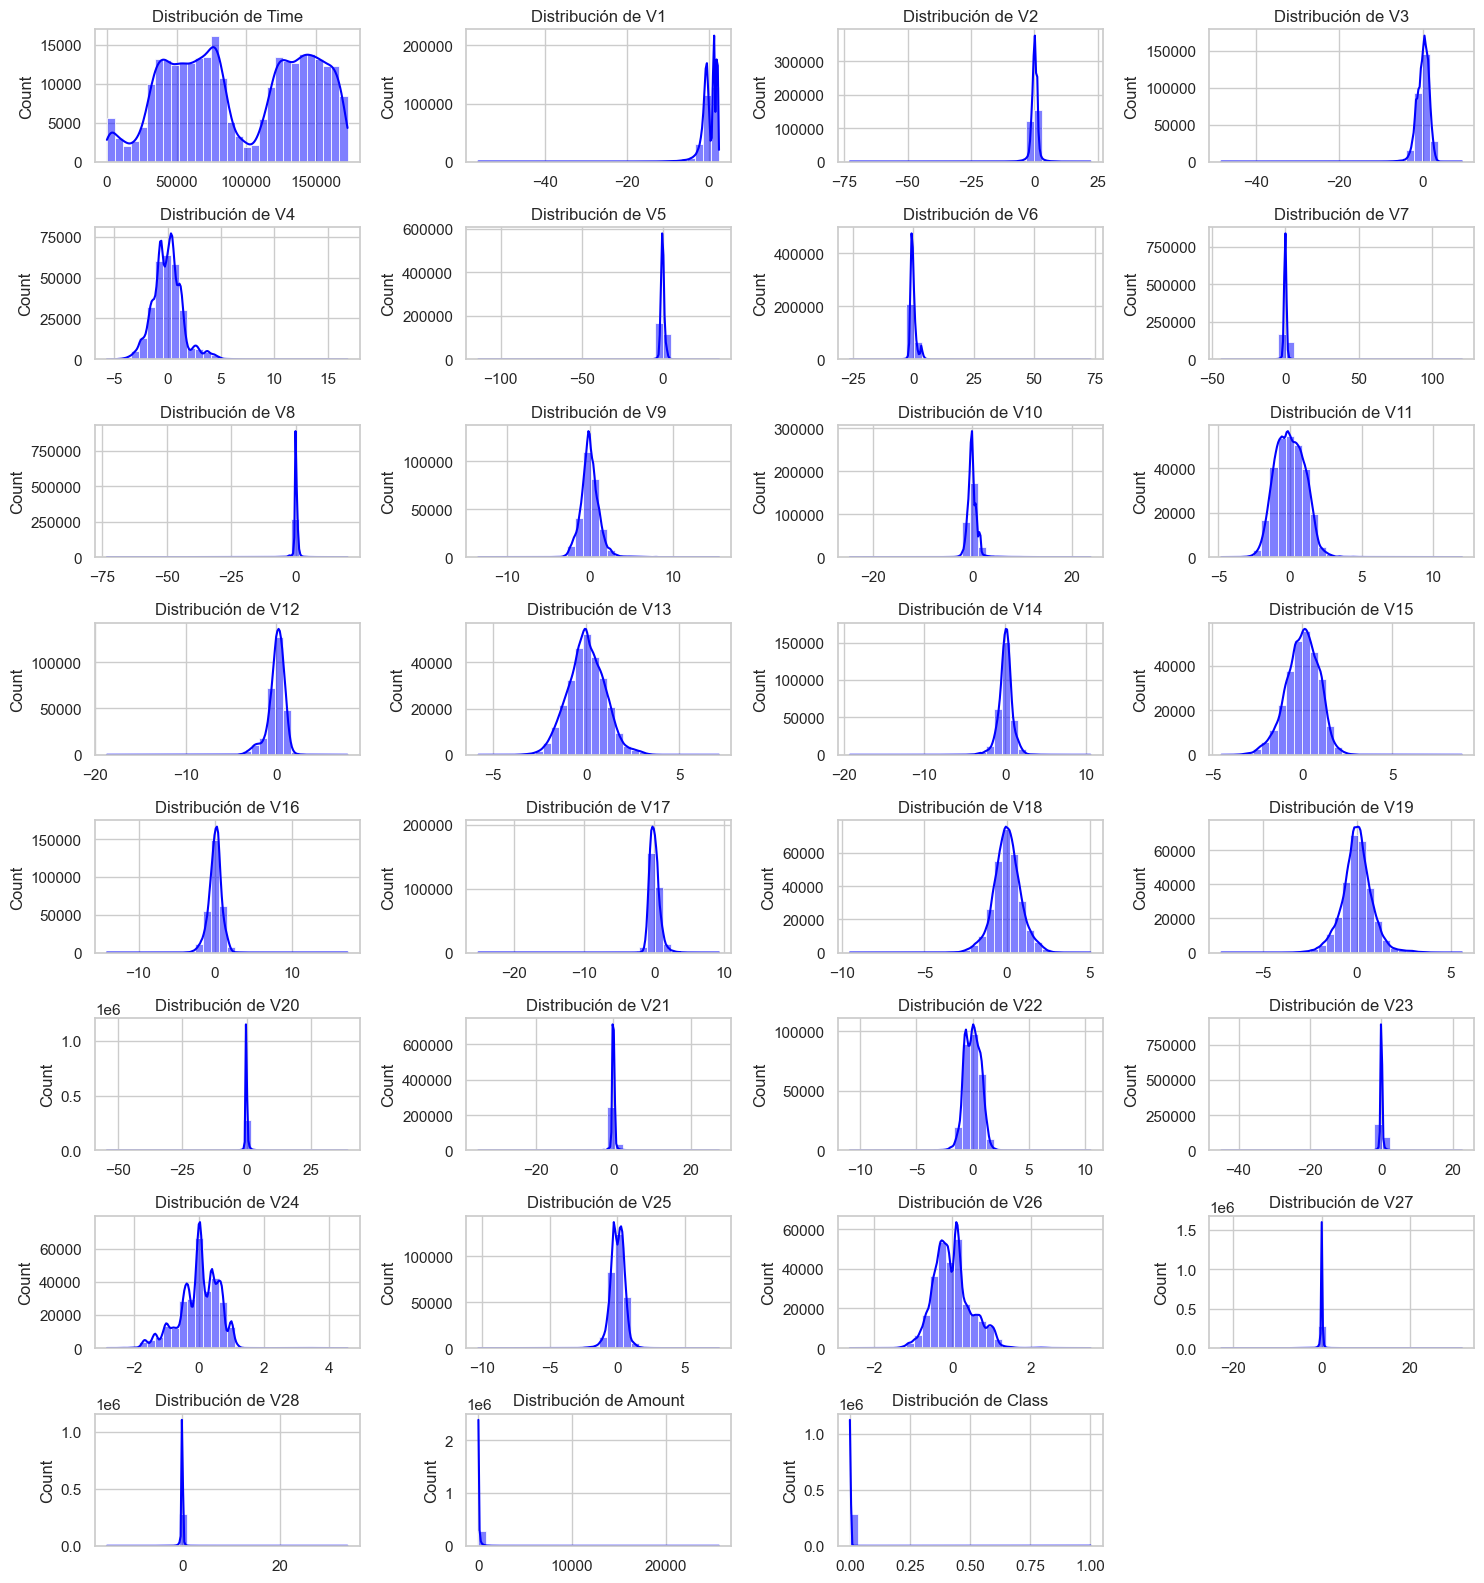

In [ ]:
# Visualización de distribuciones para variables numéricas
numeric_cols = data.select_dtypes(include=np.number).columns

print("Visualización de distribuciones:")
n_cols = len(numeric_cols)  
n_rows = math.ceil(n_cols / 4)  

plt.figure(figsize=(15, 2 * n_rows)) 
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, 4, i) 
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribución de {col}")
    plt.xlabel('')
plt.tight_layout()
plt.show()

# Matriz de correlación

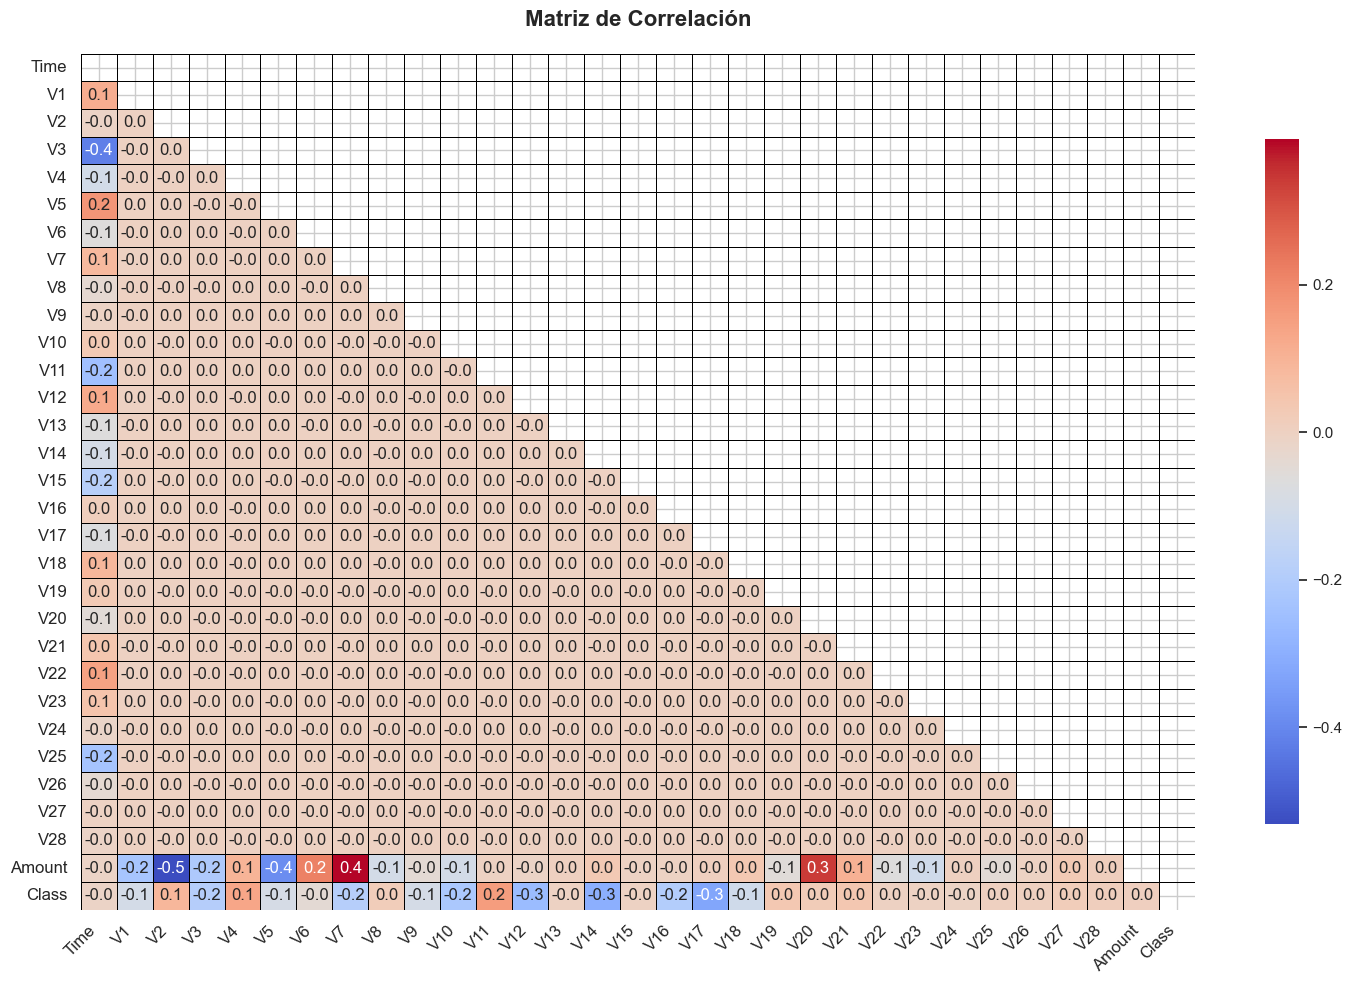

In [33]:
# Matriz de correlación
correlation_matrix = data.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Visualización de la matriz de correlación mejorada
plt.figure(figsize=(15, 10))
sns.heatmap(
    correlation_matrix,
    mask = mask,
    annot=True,          
    fmt='.1f',           
    cmap='coolwarm',     
    cbar_kws={'shrink': 0.8},  
    linewidths=0.5,      
    linecolor='black',
    square=False   
)
plt.title('Matriz de Correlación', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12)                           
plt.tight_layout()  
plt.show()

# Detección de valores atípicos

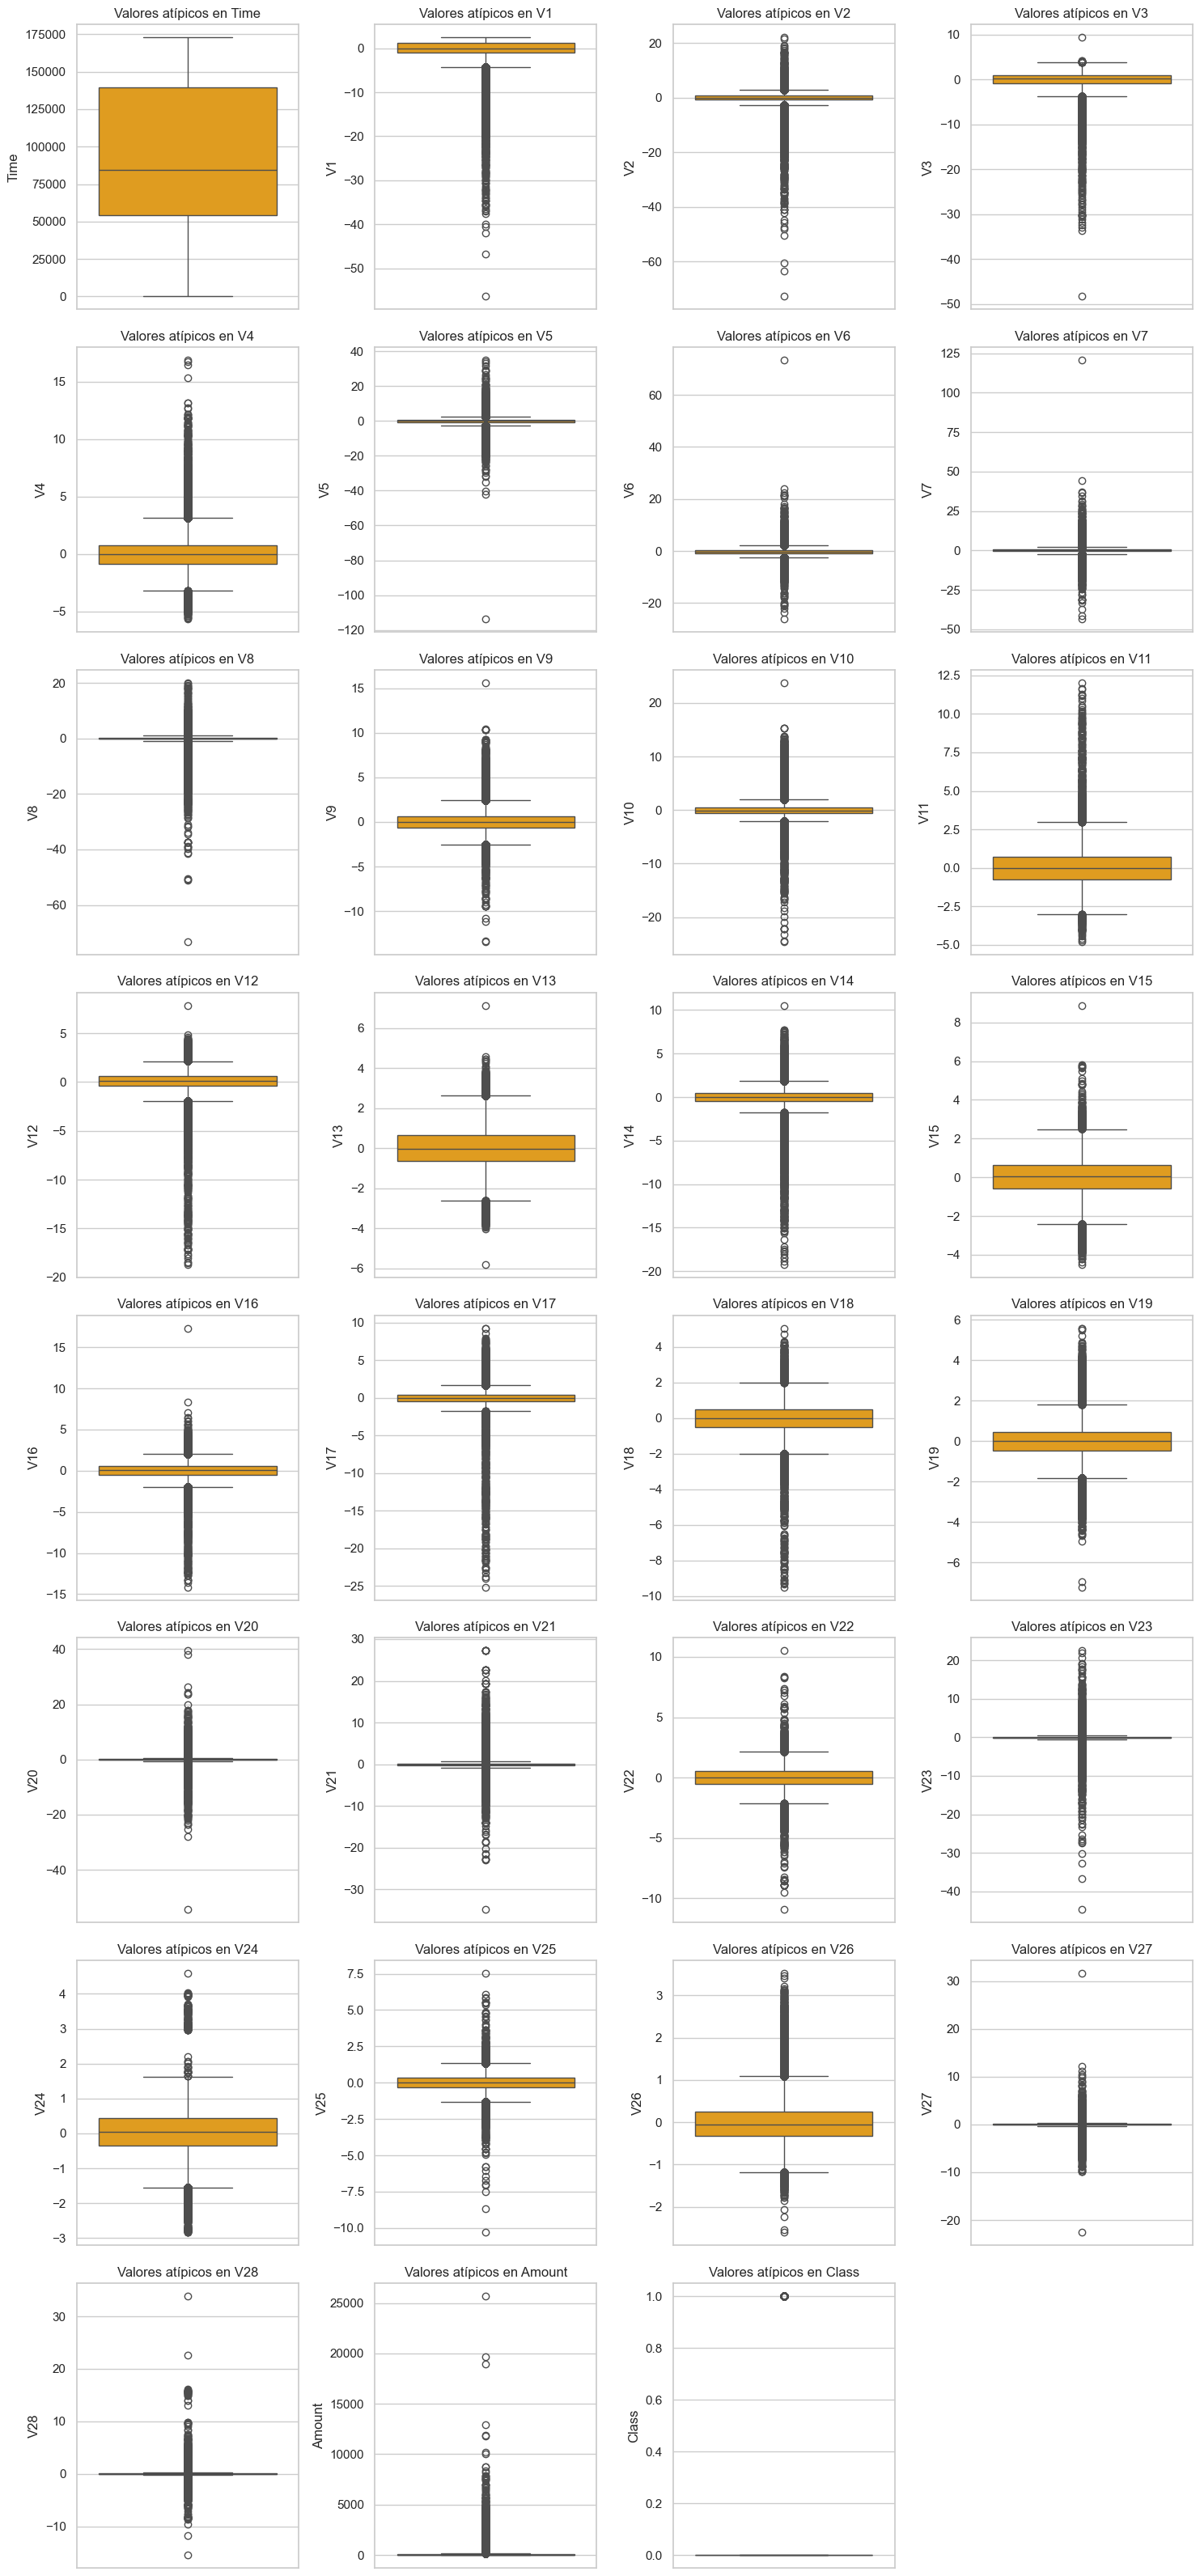

In [36]:
# Detección de valores atípicos con diagramas de caja
n_cols = len(numeric_cols)  
n_rows = math.ceil(n_cols / 4) 

plt.figure(figsize=(15, 4 * n_rows))  
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, 4, i)  
    sns.boxplot(data=data, y=col, color='orange')
    plt.title(f"Valores atípicos en {col}")
plt.tight_layout()
plt.show()

# Análisis de la variable objetivo

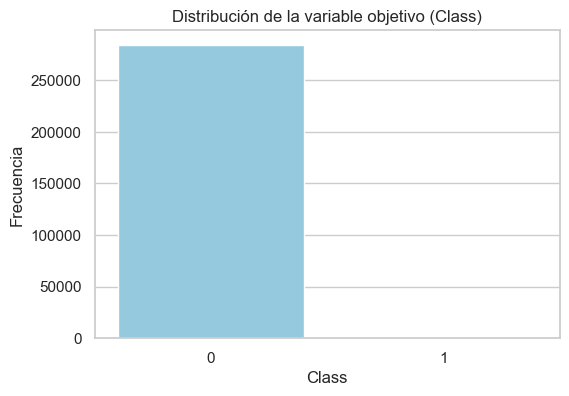

In [38]:
# Distribución de la variable objetivo
if 'Class' in data.columns:
    class_counts = data['Class'].value_counts()
    plt.figure(figsize=(6, 4))
    sns.barplot(x=class_counts.index, y=class_counts.values, color='skyblue')  
    plt.title('Distribución de la variable objetivo (Class)')
    plt.xlabel('Class')
    plt.ylabel('Frecuencia')
    plt.show()
else:
    print("No se encontró una columna objetivo (Class).")
